# kNN Analysis

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import numpy as np



from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data/online_shoppers.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,Returning_Visitor,True,False


In [3]:
print(df.shape)

(12330, 14)


In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [5]:
## Assuming df is your DataFrame
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
df_boolean = df.select_dtypes(include=[bool])  # Select boolean columns

# Convert boolean columns to numeric (0 and 1)
df_numeric_boolean = df_boolean.astype(int)

# Combine numeric columns and converted boolean columns
df_combined = pd.concat([df_numeric, df_numeric_boolean], axis=1)


In [6]:
X = df_combined.drop('Revenue', axis='columns')
X = pd.get_dummies(X)
y = df_combined['Revenue']
print(X.shape)
print(y.shape)

(12330, 11)
(12330,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9247, 11)
(9247,)
(3083, 11)
(3083,)


In [9]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend
6054,0,0.0,0,0.0,6,222.400000,0.000000,0.033333,63.553377,0.0,1
4362,4,45.0,0,0.0,21,819.833333,0.000000,0.002899,0.000000,0.0,0
2854,0,0.0,1,3.5,13,503.000000,0.000000,0.008333,0.000000,0.0,0
6593,9,215.5,1,12.0,12,245.600000,0.000000,0.012500,0.000000,0.0,0
10404,3,54.5,2,7.0,3,23.000000,0.066667,0.066667,0.000000,0.0,0


## Min-Max Scaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### kNN Model

In [11]:
training_accuracy=[]
validation_accuracy=[]

for k in range(1,15):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    scores= cross_val_score(clf, X_train, y_train, cv=5)
    print("k:", k, " validation accuracy", scores.mean())
    validation_accuracy.append(scores.mean())

k: 1  validation accuracy 0.8399485477906247
k: 2  validation accuracy 0.8728235861605251
k: 3  validation accuracy 0.8699042579626679
k: 4  validation accuracy 0.8773661146273369
k: 5  validation accuracy 0.876392907780685
k: 6  validation accuracy 0.8810429012029877
k: 7  validation accuracy 0.8774746320143834
k: 8  validation accuracy 0.8796371449870639
k: 9  validation accuracy 0.8775824477803926
k: 10  validation accuracy 0.8799614108429685
k: 11  validation accuracy 0.8800695774194963
k: 12  validation accuracy 0.8796370865186443
k: 13  validation accuracy 0.8802858521041322
k: 14  validation accuracy 0.8797450192214932


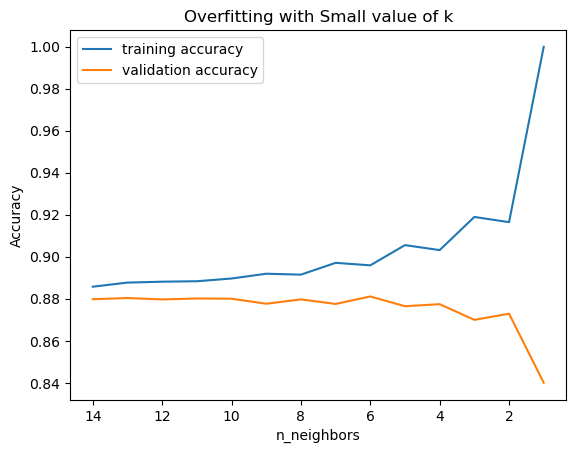

In [12]:
plt.plot(range(1,15), training_accuracy , label="training accuracy")
plt.plot(range(1,15), validation_accuracy, label="validation accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Overfitting with Small value of k')
ax = plt.gca()
ax.invert_xaxis()
plt.savefig('plots/overfitting.png')

In [13]:
model= KNeighborsClassifier(n_neighbors=6) 
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

#### Predictions on the test set

In [14]:
# Turn data into contiguous array
X_test = np.ascontiguousarray(X_test)
print(X_test)

[[0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.07407407 0.01470318 0.         ... 0.         0.         1.        ]
 [0.14814815 0.01280402 0.16666667 ... 0.09479754 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [15]:
ypred= model.predict(X_test)

In [16]:
accuracy_knn = accuracy_score(y_test, ypred)
conf_matrix_knn = confusion_matrix(y_test, ypred)
class_report_knn = classification_report(y_test, ypred)

print("kNN Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)

kNN Accuracy: 0.8926370418423614
Confusion Matrix:
 [[2587   52]
 [ 279  165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2639
           1       0.76      0.37      0.50       444

    accuracy                           0.89      3083
   macro avg       0.83      0.68      0.72      3083
weighted avg       0.88      0.89      0.88      3083

